In [1]:
from typing import TypedDict

class PortfolioState(TypedDict):
    amount_used: float
    total_usd: float
    total_inr: float

In [2]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_used'] * 1.08
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total_inr'] = state['total_usd'] * 85
    return state

In [4]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total", calc_total)
builder.add_node("convert_to_inr", convert_to_inr)

builder.add_edge(START, "calc_total")
builder.add_edge("calc_total", "convert_to_inr")
builder.add_edge("convert_to_inr", END)

graph = builder.compile()

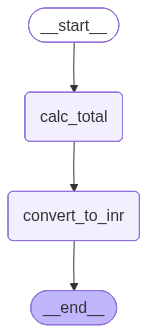

In [5]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [6]:
graph.invoke({"amount_used": 1000.0})

{'amount_used': 1000.0, 'total_usd': 1080.0, 'total_inr': 91800.0}